# Introduction to Quantitative Finance

# 量化金融导论

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

版权所有 (c) 2019 Python Charmers Pty Ltd, 澳大利亚, <https://pythoncharmers.com>。保留所有权利。

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

根据知识共享署名-非商业性使用 4.0 国际 (CC BY-NC 4.0) 许可证发布。详情请参阅 `LICENSE.md`。

Sponsored by Tibra Global Services, <https://tibra.com>

由 Tibra Global Services 赞助，<https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.3: Ordinary Least Squares

## 模块 1.3: 普通最小二乘法

### 1.3.2 Multivariate OLS

In the previous module, we looked at the Ordinary Least Squares (OLS) method for solving Linear Regression problems of the form:

在之前的模块中，我们研究了用于解决线性回归问题的普通最小二乘法（OLS）方法，其形式为：

$ Y = X\beta + \boldsymbol{u}$

Where $Y$ is the variable we are attempting to predict (the dependent variable), $X$ is our independent variable (or multiple variables, as we will see in the next notebook), $\beta$ is the parameters we are trying to learn, and $u$ is the error of our model, as we can often not predict data perfectly.

其中，$Y$ 是我们试图预测的变量（因变量），$X$ 是我们的自变量（或多个变量，正如我们将在下一个笔记本中看到的），$\beta$ 是我们试图学习的参数，$u$ 是我们模型的误差，因为我们通常无法完美地预测数据。

In that previous module, we had just a single input variable (and added another for the constant). Most models have many, many more, including in some cases combinations of features (such as multiplying two feature values together). Multivariate OLS allows this. For instance, we might try and predict a stock price by taking the stock price of several competitors as input.

在之前的模块中，我们只有一个输入变量（并添加了另一个用于常数）。大多数模型有许多更多的变量，包括在某些情况下特征的组合（例如将两个特征值相乘）。多元OLS允许这样做。例如，我们可能会尝试通过将几个竞争对手的股票价格作为输入来预测股票价格。

The actual equation for OLS doesn't change. Instead, our understanding of the components ($Y$, $X$, $\beta$ and $u$) does. Rather than be single vectors or single values, they are instead matrices and vectors.

OLS 的实际方程并没有改变。相反，我们对各个组成部分（$Y$、$X$、$\beta$ 和 $u$）的理解发生了变化。它们不再是单个向量或单个值，而是矩阵和向量。

For those unfamiliar with matrix algebra, we will take a quick detour through this topic, before linking it back to Multivariate OLS at the end of this module.

对于那些不熟悉矩阵代数的读者，我们将快速浏览一下这个主题，然后在本模块的最后将其与多元OLS联系起来。


In [1]:
%run setup.ipy

### Matrix Algebra

### 矩阵代数

Matrices are used for a very wide range of applications. They are rectangular collections of numbers, and follow several rules on multiplying, adding, dividing and other actions. There are a few differences from algebra in more "standard" mathematics, for instance $A \times B \neq B \times A$ in most cases.

矩阵被用于非常广泛的应用领域。它们是数字的矩形集合，并且在乘法、加法、除法和其他操作中遵循一些规则。与更“标准”的数学中的代数相比，有一些不同之处，例如在大多数情况下 $A \times B \neq B \times A$。

In matrix algebra, single values still exist, known as *scalars*:

在矩阵代数中，仍然存在单个值，称为*标量*：

Mathematically: $a = 1$.

In code:

在代码中：


In [2]:
# 定义一个变量a并赋值为1
a = 1

On notation, as it is important going forward, a scalar is almost always written as a standard lowercase letter (specifically, not bold, as we will see soon).

关于符号表示，由于它在后续内容中非常重要，标量几乎总是用标准的小写字母表示（具体来说，不加粗，我们很快就会看到）。

For an ordered list of values, denoted a *vector* in matrix algebra, we use a bold lowercase letter. We can't bold our variable names in Python, so we will just continue to use lowercase letters. If you want to distinguish, some use an underscore: `_u`

对于有序的值列表，在矩阵代数中称为*向量*，我们使用粗体小写字母。在 Python 中我们无法将变量名加粗，因此我们将继续使用小写字母。如果你想区分，有些人会使用下划线：`_u`

Mathematically: $\boldsymbol{u} = [0.1, 0.3, 4.6]$

In code, for the NumPy library:

在代码中，对于 NumPy 库：


In [3]:
# 导入numpy库并重命名为np
import numpy as np

# 创建一个一维数组u，包含三个浮点数元素[0.1, 0.3, 4.6]
u = np.array([0.1, 0.3, 4.6])

For rectangular groups of numbers, known as a **matrix**, we use an uppercase letter:

对于由数字组成的矩形组，称为**矩阵**，我们使用大写字母：

Mathematically:

$ X = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 
\end{bmatrix}  $


In code:

在代码中：


In [4]:
# 创建一个2维数组X,包含3行2列的数据
X = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

In NumPy, the word *array* is used, as it can represent both a single vector or a matrix, or even higher-order data! The key distinction is the `shape` and `ndims`:

在 NumPy 中，使用 *array* 这个词，因为它既可以表示单个向量或矩阵，甚至可以表示更高阶的数据！关键的区别在于 `shape` 和 `ndims`：


In [5]:
# 获取数组u的形状(维度大小)
u.shape

(3,)

In [6]:
# 获取数组u的维度数
u.ndim

1

In [7]:
# 获取数组X的形状(维度大小)
X.shape

(3, 2)

In [8]:
# 获取数组X的维度数量
X.ndim

2

Here we can see that $\boldsymbol{u}$ has one dimension (`u.ndim`), and has a shape indicating it has 3 values in that one dimension.

在这里我们可以看到，$\boldsymbol{u}$ 有一个维度（`u.ndim`），并且其形状表明它在该维度上有 3 个值。

In contrast, $X$ has two dimensions (`X.ndim`), it has 3 rows, and each row has 2 columns. There are six values total:

相比之下，$X$ 有两个维度（`X.ndim`），它有 3 行，每行有 2 列。总共有六个值：


In [9]:
# 获取数组X中元素的总个数
X.size

6

#### Exercises

#### 练习

1. Create an array representing the following matrix:

1. 创建一个表示以下矩阵的数组：
    $ \begin{bmatrix}
    10 & 20 & 30 \\
    40 & 50 & 60 
    \end{bmatrix}  $
2. In the Linear Regression Model, does the value of $\beta$ represent a matrix or vector? Hint: Look up the greek alphabet and determine if it is an uppercase or lowercase letter.

2. 在线性回归模型中，$\beta$ 的值代表矩阵还是向量？提示：查阅希腊字母表，确定它是大写字母还是小写字母。


In [10]:
# 创建一个2行3列的二维数组，第一行是[10,20,30]，第二行是[40,50,60]
A = np.array([[10,20,30],[40,50,60]])

Beta represents a one-dimensional array or vector.

Beta 表示一维数组或向量。


*For solutions, see `solutions/an_array.py`*

*有关解决方案，请参见 `solutions/an_array.py`*


### Working with matrices

### 矩阵操作

Matrix algebra follows different rules to normal algebra, but it is internally consistent and produces a wide range of benefits. First, a bit more terminology:

矩阵代数遵循与普通代数不同的规则，但它在内部是一致的，并产生了广泛的好处。首先，再介绍一些术语：

$ \begin{bmatrix}
a_{1, 1} & a_{1, 2} & a_{1, 3} \\
a_{2, 1} & a_{2, 2} & a_{2, 3} 
\end{bmatrix}  $

In this matrix, we use the subscripts identify the position of the values. Consider this matrix:

在这个矩阵中，我们使用下标来标识值的位置。考虑以下矩阵：

$ X = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6 
\end{bmatrix}  $

Here, the value $5$ is in the third row and first position, so it's position is $(3, 1)$. Let's look at this in code:

在这里，值 $5$ 位于第三行第一列，因此它的位置是 $(3, 1)$。让我们在代码中看一下：


In [11]:
# 获取二维数组X中第3行第1列的元素(索引从0开始)
X[2, 0]  # Huh!?

5

While the numbering doesn't matter for any of the math we will see in the future, just keep in mind this general pattern:

虽然编号对我们将来要看到的任何数学内容都不重要，但请记住这个一般模式：

*In mathematics, we start counting from 1. In Python (and most programming languages), we start counting from zero.*

在数学中，我们从1开始计数。在Python（以及大多数编程语言）中，我们从0开始计数。

This can trip up careful examination of the code. Luckily, as you get more familiar working with matrices, you worry less about accessing individual values inside the matrix, and more about how the matrices fit together.

这可能会在仔细检查代码时造成困扰。幸运的是，随着你对矩阵操作的熟悉，你会越来越少担心访问矩阵中的单个值，而更多地关注矩阵如何组合在一起。

Next, let's look at the most basic operations in matrix algebra, between a scalar and a matrix or vector. Multiplying a matrix or a vector by a scalar simply does that operation on every element inside the matrix/vector, known as an *elementwise* operation:

接下来，让我们看看矩阵代数中最基本的操作，即标量与矩阵或向量之间的操作。将矩阵或向量乘以标量，简单地对矩阵/向量中的每个元素执行该操作，这被称为*逐元素*操作。


In [12]:
# 将数组 X 中的每个元素乘以 2
X * 2  # Multiplies every value inside X by 2

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

In [13]:
# 对矩阵X中的每个元素都加3
X + 3  # Adds 3 to every value inside X

array([[4, 5],
       [6, 7],
       [8, 9]])

In [14]:
# 将数组 X 中的每个元素除以 10
X / 10

array([[0.1, 0.2],
       [0.3, 0.4],
       [0.5, 0.6]])

In [15]:
# 对数组X中的每个元素减去100
X - 100

array([[-99, -98],
       [-97, -96],
       [-95, -94]])

Note that the shape of the matrix doesn't change (we will see this happen next) when doing operations with scalars like this.

注意，当像这样与标量进行运算时，矩阵的形状不会改变（我们接下来会看到这一点）。

The most impactful matrix algebra method is known as the *dot product*:

最有影响力的矩阵代数方法被称为*点积*：


In [16]:
# 创建一个2x3的矩阵A
A = np.array([[1, 2, 3],
              [4, 5, 6]])
# 创建一个3x2的矩阵B
B = np.array([[10, 20],
              [30, 40],
              [50, 60]])

In [17]:
# 计算矩阵A和B的点积。如果使用Python 3.5+版本，可以使用 @ 运算符代替dot()方法
A.dot(B)  # If you are using Python 3.5+, try: A @ B

array([[220, 280],
       [490, 640]])

In [18]:
# 使用矩阵乘法运算符 @ 计算矩阵 A 和 B 的点积
A@B

array([[220, 280],
       [490, 640]])

The dot product has a key requirement. The "inner dimensions" must match. In the above examine, we are computing the dot product of $A$ and $B$. The order is important. $A$ has a shape of 2 by 3, and $B$ has a shape of 3 by 2. The "inner values", i.e. 3, match, so we can compute the dot product.

点积有一个关键要求。"内部维度"必须匹配。在上面的例子中，我们正在计算 $A$ 和 $B$ 的点积。顺序很重要。$A$ 的形状是 2 乘 3，$B$ 的形状是 3 乘 2。"内部值"，即 3，匹配，所以我们可以计算点积。

This operation, in contrast, doesn't work, because $C$ is of shape 4 by 3, and the inner dimension doesn't match:

这个操作，相比之下，无法进行，因为 $C$ 的形状是 4 乘 3，内部维度不匹配：


In [19]:
# 尝试计算矩阵点积，但由于维度不匹配会抛出异常
try:
    # 创建一个包含0-11的数组并重塑为4x3矩阵
    C = np.arange(12).reshape(4, 3)
    # 尝试计算矩阵A和C的点积，但由于维度不匹配会失败
    A.dot(C)
except ValueError as e:
    # 打印错误信息
    print("Could not compute dot product of matrices. Error was:")
    print(e)

Could not compute dot product of matrices. Error was:
shapes (2,3) and (4,3) not aligned: 3 (dim 1) != 4 (dim 0)


In a dot product, the resulting matrix will be the size of the outer dimensions. In our previous (working) example, $AB$, the outer dimensions were both 2, so the resulting value was a 2 by 2 matrix.

在点积中，结果矩阵的大小将是外部维度的大小。在我们之前的（有效的）例子中，$AB$，外部维度都是2，因此结果值是一个2乘2的矩阵。

The values of the dot product are the *sum of the products* from the original two matrices, from the row of the first matrix and the column of the second matrix. In other words, for position (i, j) in the dot product, we get the ith row from the first matrix, and the jth column of the second matrix. For our example $AB$, and for position (2, 1) of the dot product, the second row of $A$ is $[4, 5, 6]$ and the first column of $B$ is $[10, 30, 50]$. We then sum the products of the individual values:

点积的值是来自原始两个矩阵的*乘积之和*，即第一个矩阵的行与第二个矩阵的列的乘积之和。换句话说，对于点积中的位置 (i, j)，我们从第一个矩阵中获取第 i 行，从第二个矩阵中获取第 j 列。以我们的例子 $AB$ 为例，对于点积的位置 (2, 1)，$A$ 的第二行是 $[4, 5, 6]$，$B$ 的第一列是 $[10, 30, 50]$。然后我们将各个值的乘积相加：

$result = 4 \times 10 + 5 \times 30 + 6 \times 50 = 490$

We repeat this process for every row/column combination, resulting in the dot product matrix, obtaining the result we saw above.

我们对每一行/列组合重复这个过程，最终得到点积矩阵，得到我们上面看到的结果。

When we compute the dot product including a vector, we need to make the distinction between a *row vector* and a *column vector*. In short, a *row vector* can be thought of as a matrix with one row, and a *column vector* as a matrix with one column. From here, the rules are the same as above (i.e. the inner dimensions must match and so on, just some of those dimension values are 1s).

当我们计算包含向量的点积时，我们需要区分*行向量*和*列向量*。简而言之，*行向量*可以被视为只有一行的矩阵，而*列向量*可以被视为只有一列的矩阵。从这里开始，规则与上述相同（即内部维度必须匹配，依此类推，只是其中一些维度值为1）。


In [20]:
# 创建一个2维数组V1,值为[[10, 20, 30]]。注意使用双层方括号来创建2维数组
V1 = np.array([[10, 20, 30]])  # Note the double brackets, which create a two dimensional array
# 查看V1数组的形状
V1.shape

(1, 3)

In [21]:
# 获取数组B的形状维度
B.shape

(3, 2)

In [22]:
# 计算矩阵 V1 和矩阵 B 的点积
V1.dot(B)

array([[2200, 2800]])

In [23]:
# 使用矩阵乘法计算V1和B的乘积，等同于V1.dot(B)
np.matmul(V1,B)

array([[2200, 2800]])

In [24]:
# 将矩阵 V1 转置，即行列互换
V1.transpose()

array([[10],
       [20],
       [30]])

#### Exercises

#### 练习

1. Create a column vector `V2` such that the value `B.dot(V2)` can be computed. 

1. 创建一个列向量 `V2`，使得可以计算 `B.dot(V2)` 的值。
2. What is the dot product when all values in `V2` are ones?

2. 当 `V2` 中的所有值都为 1 时，点积是多少？
3. You can transpose any NumPy array with two dimensions or more by calling `X.transpose()` or `X.T`. What does this function do? Hint: Look at the shape of the array

3. 你可以通过调用 `X.transpose()` 或 `X.T` 来转置任何具有两个或更多维度的 NumPy 数组。这个函数的作用是什么？提示：查看数组的形状。


In [25]:
# 创建一个2x1的列向量,值都为1
V2 = np.array([[1], [1]])
# 计算矩阵B和列向量V2的点积
B.dot(V2)
# 打印说明:当V2是全1的列向量时,点积结果是B的每一行元素之和。转置会反转维度。
print("The dot product is the sum of the rows of B when V2 is a column vector of ones. Transposing reverses the dimensions.")

The dot product is the sum of the rows of B when V2 is a column vector of ones. Transposing reverses the dimensions.


*For solutions, see `solutions/matrix_products.py`*

*有关解决方案，请参见 `solutions/matrix_products.py`*


### Matrix algebra terminology and properties

### 矩阵代数术语和性质

There are quite a few bits of terminology that are important to know before going forward:

在继续之前，有一些术语非常重要，需要了解：

* **square matrix**: A matrix where the number of rows is equal to the number of columns

* **方阵**: 行数与列数相等的矩阵
* **diagonal matrix**: A square matrix, where only values on the diagonal are non-zero and all other values are zero. That is, for value in position (i, j), it is zero if $i\neq j$, and *may be non-zero* only if $i=j$

* **对角矩阵**: 一个方阵，其中只有对角线上的值是非零的，其他所有值都是零。也就是说，对于位置 (i, j) 上的值，如果 $i\neq j$，则为零，只有在 $i=j$ 时*可能非零*。
* **identity matrix**: A diagonal matrix where *all* diagonal elements are 1. It is denoted as $I$, and usually the size is implied by the context (i.e. if you are computing the dot product $XI$, then $I$ will be a square matrix with the size of the second dimension of $X$).

* **单位矩阵**：一个对角矩阵，其中*所有*对角线元素均为1。它用$I$表示，通常其大小由上下文决定（例如，如果你正在计算点积$XI$，那么$I$将是一个与$X$的第二维度大小相同的方阵）。
* **scalar matrix**: A diagonal matrix where *all* diagonal elements are some scalar value. Its size too can often be implied by the context.

* **标量矩阵**：一种对角矩阵，其中*所有*对角线元素都是某个标量值。其大小通常也可以从上下文中推断出来。
* **transpose**: rotating a matrix 90°, denoted by a quote symbol. That is, the transpose of $A$ is $A'$, and it has values such that $A_{i, j} = A'_{j, i}$. The transpose of the transpose of a matrix is equal to the original matrix, i.e. $A'' = A$.

* **转置**：将矩阵旋转90°，用引号符号表示。即，矩阵 $A$ 的转置为 $A'$，其值满足 $A_{i, j} = A'_{j, i}$。矩阵的转置的转置等于原矩阵，即 $A'' = A$。
* **symmetric matrix**: A matrix that is equal to its transpose.

* **对称矩阵**: 一个矩阵等于其转置矩阵。
* **null matrix/vector**: A matrix/vector where all values are 0. Its size is often implied from the context.

* **零矩阵/向量**: 所有值都为0的矩阵/向量。其大小通常由上下文推断。


#### Exercises

#### 练习

1. Use the `np.arange` and `np.reshape` functions to create a square matrix

1. 使用 `np.arange` 和 `np.reshape` 函数创建一个方阵
2. Use the `np.diag` function to create a diagonal matrix

2. 使用 `np.diag` 函数创建一个对角矩阵
3. Use the `np.eye` function to create an identity matrix
4. Create a scalar matrix

4. 创建一个标量矩阵
5. Use the `np.zeros` function to create a null matrix of size 4 by 5

5. 使用 `np.zeros` 函数创建一个大小为 4 行 5 列的零矩阵


In [26]:
# 创建一个3x3的方阵，值从0到8
SQ = np.arange(9).reshape([3,3])
print(SQ)

# 创建一个对角矩阵，对角线上的值为[3,3,4,5]
DG = np.diag([3,3,4,5])
print(DG)

# 创建一个3x3的单位矩阵(对角线为1，其他位置为0)
I = np.eye(3)
print(I)

# 将单位矩阵的所有元素乘以9
SC = I*9
print(C)

# 创建一个4x5的全零矩阵
Z = np.zeros([4,5])
print(Z)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[3 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 5]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


*For solutions, see `solutions/matrix_terminology.py`*

*有关解决方案，请参见 `solutions/matrix_terminology.py`*


### Matrix inversion

### 矩阵求逆

The inverse of a matrix ($A$) is a matrix ($A^{-1}$) satisfying the equation $A^{-1}A = AA^{-1} = I$, remembering that $I$ is the identity matrix, a square matrix with all ones on the diagonal, and zeros elsewhere.

矩阵的逆（$A$）是一个满足方程 $A^{-1}A = AA^{-1} = I$ 的矩阵（$A^{-1}$），记住 $I$ 是单位矩阵，一个对角线全为1，其余部分全为0的方阵。

If $A$ is a matrix of size $(n, m)$, then $I$ must be of size $(n, n)$. This is due to the dot product, meaning the inverse must be of size $(m, n)$ to compute the dot product in the first place. However, the inverse can only be computed for square matrices. The size of $A$ in this process will be $(n, n)$, so the inverse must also be $(n, n)$.

如果 $A$ 是一个大小为 $(n, m)$ 的矩阵，那么 $I$ 必须是大小为 $(n, n)$ 的矩阵。这是由于点积的原因，意味着逆矩阵必须首先具有 $(m, n)$ 的大小才能计算点积。然而，逆矩阵只能为方阵计算。在此过程中，$A$ 的大小将是 $(n, n)$，因此逆矩阵也必须是 $(n, n)$ 的大小。

Not every square matrix has an inverse. Looking at how to compute the inverse of a matrix will take us a little too far off topic for now. To investigate this further, start with this website from Wolfram: http://mathworld.wolfram.com/MatrixInverse.html

并非每个方阵都有逆矩阵。目前来看，讨论如何计算矩阵的逆会让我们偏离主题太远。要进一步研究这个问题，可以从Wolfram的这个网站开始：http://mathworld.wolfram.com/MatrixInverse.html

We can compute the inverse using the `np.linalg.inv` function.

我们可以使用 `np.linalg.inv` 函数来计算逆矩阵。


In [27]:
# 计算矩阵A和B的点积,结果存储在矩阵D中(D是一个方阵)
D = A.dot(B)  # Note: D is square

In [28]:
# 使用numpy的线性代数函数计算矩阵D的逆矩阵
D_inverse = np.linalg.inv(D)

In [29]:
# 输出矩阵D的逆矩阵
D_inverse

array([[ 0.17777778, -0.07777778],
       [-0.13611111,  0.06111111]])

In [30]:
# 计算矩阵 D 和其逆矩阵 D_inverse 的点积,理论上应该得到单位矩阵
D.dot(D_inverse)

array([[ 1.00000000e+00, -1.66533454e-15],
       [-7.10542736e-15,  1.00000000e+00]])

In [31]:
# 由于计算机浮点数计算的特性，矩阵与其逆矩阵相乘的结果与单位矩阵非常接近但并不完全相等
D.dot(D_inverse) == np.eye(2)

array([[False, False],
       [False, False]])

In [32]:
# 这个函数可以帮助我们比较两个矩阵是否近似相等
np.allclose(D.dot(D_inverse), np.eye(2))

True

### Multivariate OLS derivation

### 多元OLS推导

Now that we have an understanding of matrix algebra, we can review our model for the Linear Regression model to incorporate multiple values. That said, what does our input data actually look like?

既然我们已经理解了矩阵代数，我们可以回顾一下线性回归模型，以纳入多个值。那么，我们的输入数据实际上是什么样子的呢？

We often use $X$ as our set of independent variables. It is a carefully constructed matrix, with size $n$ by $k$, where $n$ is the number of samples, and $k$ is the number of measurements *per sample*. It is critically important that samples and measurement types are aligned. That is, all values for row $i$ must correspond to the same sample $i$, and all values in column $j$ must correspond to the same measurement type for each sample. Therefore, the value in $X_{i, j}$ is measurement type $j$ for sample $i$.

我们通常使用 $X$ 作为我们的自变量集合。它是一个精心构建的矩阵，大小为 $n$ 乘以 $k$，其中 $n$ 是样本数量，$k$ 是每个样本的测量数量。样本和测量类型的对齐至关重要。也就是说，行 $i$ 中的所有值必须对应于同一个样本 $i$，而列 $j$ 中的所有值必须对应于每个样本的相同测量类型。因此，$X_{i, j}$ 中的值是样本 $i$ 的测量类型 $j$。

As an example, a sample could be a given day. A measurement type could be "closing price of IBM". Therefore, the corresponding value would be the closing price of IBM on that given day. Another measurement for that day could be "number of trades for MSFT". Another could be temperature. These multiple measurements of the same sample would appear in the same row. Each column would be the same *type* of measurement, for multiple samples.

翻译结果:
例如，一个样本可以是某一天。一个测量类型可以是“IBM的收盘价”。因此，对应的值将是该天IBM的收盘价。该天的另一个测量可以是“MSFT的交易数量”。另一个可以是温度。这些同一样本的多个测量将出现在同一行中。每一列将是相同类型的测量，针对多个样本。

Additionally, it helps the Linear Regression model significantly to add a bias to the model. To do this, simply have one of the "measurements" (usually the first) simply always return the scalar 1. That makes your first column in $X$ just ones, and then the actual measurements take up the rest of the columns. To visualise why this is important, consider the following two models:

此外，向线性回归模型添加偏置项可以显著提升模型的效果。为此，只需让其中一个“测量值”（通常是第一个）始终返回标量1。这样，矩阵$X$的第一列就全是1，而实际的测量值则占据其余列。为了理解为什么这样做很重要，可以考虑以下两个模型：


In [33]:
# 创建一个从-100到100的等差数列,共1000个点
x = np.linspace(-100, 100, 1000)

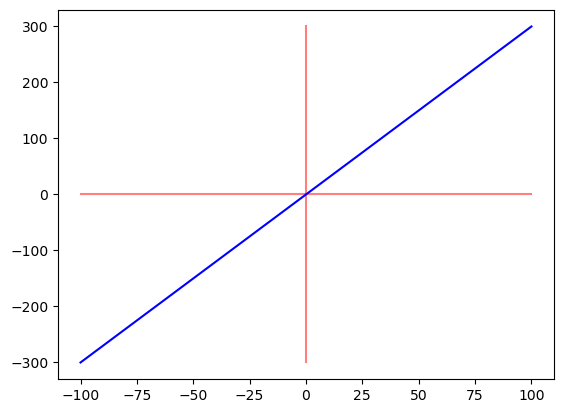

In [34]:
# 不包含截距项的线性方程
gradient = 3  # 设置斜率为3
y1 = x * gradient  # 计算y值，y = 3x

# 用红色绘制坐标轴
plt.plot(x, np.zeros(len(x)), 'r-', alpha=0.5)  # 绘制x轴，alpha=0.5表示半透明
plt.plot(np.zeros(len(y1)), y1, 'r-', alpha=0.5)  # 绘制y轴，alpha=0.5表示半透明

# 用蓝色绘制直线y=3x
plt.plot(x, y1, 'b-')

In the above plot, we can change the gradient, but the line must go through the origin (try it!). If we add a bias, we can then have lines that do not go through the origin:

在上面的图中，我们可以改变梯度，但直线必须经过原点（试试看！）。如果我们添加一个偏置，就可以得到不经过原点的直线：


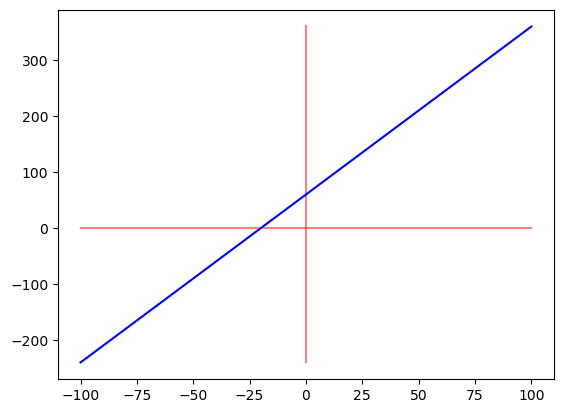

In [35]:
# 定义直线的斜率为3
gradient = 3
# 定义直线的截距为60
bias = 60

# 计算直线方程 y = 3x + 60
y2 = gradient * x + bias

# Plot the origin axes in red
plt.plot(x, np.zeros(len(x)), 'r-', alpha=0.5)
plt.plot(np.zeros(len(y2)), y2, 'r-', alpha=0.5)

# Plot the data in blue
plt.plot(x, y2, 'b-')

This result is true too of higher-dimensional data. This gives our model much more predictive power, simply by adding ones to our matrix! The $\beta$ values for this constant column are learned in the same way that the other variables.

这个结果对于高维数据也是成立的。通过简单地在矩阵中添加一列1，我们的模型获得了更强的预测能力！这个常数列的$\beta$值与其他变量的学习方式相同。

Now that we have the format for $X$, let's look at the shape of the other parts of the Linear Model. As a reminder, we have denoted the shape of $X$ as an $n$ by $k$ matrix, where $n$ is the number of samples and $k$ is the number of measurements (also called "features").

现在我们已经了解了 $X$ 的格式，让我们来看看线性模型的其他部分的形状。提醒一下，我们将 $X$ 的形状表示为 $n$ 乘 $k$ 的矩阵，其中 $n$ 是样本数量，$k$ 是测量数量（也称为“特征”）。

* $\boldsymbol{y}$ is a column vector with shape $n$ by 1. It is the predicted value, for each sample.
* $\beta$ is a column vector with shape $k$ by 1. It is the value we multiply each measurement by, i.e. each measurement's "weight"
* $\boldsymbol{u}$ is the error term for the prediction of each sample. It therefore has shape $n$ by 1.

Using this information and our new knowledge of matrix algebra, we can derive the OLS Estimator for multivariate OLS, where $X$ contains multiple measurements:

利用这些信息和我们新学到的矩阵代数知识，我们可以推导出多元OLS的OLS估计量，其中$X$包含多个测量值：


$$
\begin{align*}
u'u & = (y - Xb)'(y - Xb) \\
    & = y'y - y'Xb - b'X'y + b'X'Xb \\
    & = y'y - 2b'X'y + b'X'Xb
\end{align*}
$$


Setting $\frac{ \partial(\boldsymbol{u'}\boldsymbol{u})}{ \partial\beta} = 0$ yields:

$$
\begin{align}
0 &= -2X'y + 2X'Xb \\
b &= (X'X)^{-1}X'y
\end{align}
$$

Let us now have a look at how to do multivariate OLS within code, in the `statsmodels` package, using two interfaces, the functional and the formula interface.

现在让我们来看看如何在代码中使用 `statsmodels` 包进行多元 OLS，使用两种接口：函数式接口和公式接口。


In [36]:
# 首先,从 Quandl 获取数据 - 利率、通货膨胀率和澳元汇率

In [40]:
# # 导入 quandl 库，用于获取金融数据
# import quandl

# # 从 quandl 获取澳大利亚储备银行的利率数据
# interest_rates = quandl.get("RBA/F13_FOOIRATCR")
# interest_rates = interest_rates[interest_rates.columns[0]]  # Extract the first column, whatever it is called
# interest_rates.name = "InterestRate"  # Rename, as the original had a long name. Hint: don't use spaces or special chars

# 导入所需库
import yfinance as yf
import pandas as pd
import numpy as np

# 获取澳大利亚国债收益率ETF作为利率替代指标
# 使用澳大利亚政府债券ETF (GOVT.AX)和iShares Treasury ETF (IAF.AX)作为备选
try:
    interest_proxy = yf.download('GOVT.AX', start='2010-01-01')['Close']
except:
    try:
        interest_proxy = yf.download('IAF.AX', start='2010-01-01')['Close']
    except:
        # 如果ETF数据不可用，使用澳大利亚10年期国债收益率
        interest_proxy = yf.download('^ATVL10', start='2010-01-01')['Close']
interest_proxy.name = 'InterestRate'
interest_rates = interest_proxy
interest_rates.name = 'InterestRate'

# 获取澳元兑美元汇率数据
# 尝试多个汇率数据源
try:
    audusd = yf.download('AUDUSD=X', start='2010-01-01')['Close']
except:
    try:
        audusd = yf.download('AUD=X', start='2010-01-01')['Close']
    except:
        # 如果直接汇率不可用，使用澳元ETF (FXA)
        audusd = yf.download('FXA', start='2010-01-01')['Close']
audusd.name = 'AUDUSD'

# 获取澳大利亚通胀率的替代指标
# 使用多个通胀相关ETF作为替代
try:
    inflation_proxy = yf.download('ILB.AX', start='2010-01-01')['Close']
except:
    try:
        # 使用澳大利亚消费者必需品ETF作为通胀替代指标
        inflation_proxy = yf.download('EZA', start='2010-01-01')['Close']
    except:
        # 使用全球通胀挂钩债券ETF
        inflation_proxy = yf.download('GTIP', start='2010-01-01')['Close']
inflation_proxy.name = 'Inflation'

# 将数据合并到一个DataFrame中
data = pd.concat([interest_proxy, audusd, inflation_proxy], axis=1)

# 处理缺失值
# 1. 首先使用前向填充
data = data.fillna(method='ffill')
# 2. 然后使用后向填充处理开始的缺失值
data = data.fillna(method='bfill')

print("数据集大小:", data.shape)
print("\n数据集前5行:")
print(data.head())
print("\n数据集中的缺失值:")
print(data.isnull().sum())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

数据集大小: (3920, 3)

数据集前5行:
Ticker        GOVT.AX  AUDUSD=X     ILB.AX
Date                                      
2010-01-01  18.900673  0.898473  85.899384
2010-01-04  18.900673  0.912492  85.899384
2010-01-05  18.900673  0.911826  85.899384
2010-01-06  18.900673  0.920471  85.899384
2010-01-07  18.900673  0.917768  85.899384

数据集中的缺失值:
Ticker
GOVT.AX     0
AUDUSD=X    0
ILB.AX      0
dtype: int64



/tmp/ipykernel_58026/798281063.py:58: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
/tmp/ipykernel_58026/798281063.py:60: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')


In [41]:
# 显示利率数据的前5行
interest_rates.head()

Ticker        GOVT.AX
Date                 
2012-07-27  18.900673
2012-07-30  18.802050
2012-07-31  18.821093
2012-08-01  18.802271
2012-08-02  18.776155

In [42]:
# 从Quandl获取澳大利亚通货膨胀率数据
inflation = quandl.get("RBA/G01_GCPIAGSAQP")
# 将数据列名重命名为'Inflation'
inflation.columns = ['Inflation']

NameError: name 'quandl' is not defined

In [97]:
# 使用 iloc 索引方式获取第一列数据,这是获取第一列的另一种方法
inflation = inflation.iloc[:, 0]  # Another way to achieve the same "get the first column"

In [98]:
# 显示通货膨胀数据的前5行
inflation.head()

Date
1982-06-30    2.5
1982-09-30    3.5
1982-12-31    2.7
1983-03-31    2.4
1983-06-30    2.2
Name: Inflation, dtype: float64

In [100]:
# 从 Quandl 获取澳元兑美元汇率数据
au_dollar = quandl.get("BUNDESBANK/BBEX3_M_AUD_USD_CM_AC_A01")['Value']
# 将数据列名重命名为 AUDUSD
au_dollar.name = "AUDUSD"

In [101]:
# 展示澳元汇率数据的前5行
au_dollar.head()

Date
1974-01-31    1.4875
1974-02-28    1.4875
1974-03-31    1.4875
1974-04-30    1.4875
1974-05-31    1.4875
Name: AUDUSD, dtype: float64

In [104]:
# 将多个数据序列合并在一起创建数据集

In [104]:
# 使用pd.concat()函数将利率、通货膨胀率和澳元汇率三个数据序列按列(axis=1)合并成一个DataFrame数据框
data = pd.concat([interest_rates, inflation, au_dollar], axis=1)  # Combines multiple series into a DataFrame

In [105]:
# 删除数据集中的所有缺失值(NA)，直接在原数据上修改
data.dropna(inplace=True)
# 获取处理后的数据集长度
len(data)

125

In [106]:
# 显示数据集的前5行数据
data.head()

InterestRate  Inflation  AUDUSD
Date                                       
1990-03-31          16.5        1.6  0.7542
1990-06-30          15.0        1.8  0.7890
1990-09-30          14.0        0.9  0.8265
1990-12-31          12.0        2.4  0.7733
1991-03-31          12.0       -0.2  0.7752

In [107]:
# 使用利率和美元汇率来预测通货膨胀率
# Using the interest rate and USD conversion to predict Inflation
X = data[["InterestRate", "AUDUSD"]]  # 选取利率和澳元兑美元汇率作为特征变量
y = data['Inflation']  # 选取通货膨胀率作为目标变量

In [108]:
# 导入statsmodels统计建模库
import statsmodels.api as sm
# Nice helper function from statsmodels for adding a bias/constant
# 使用statsmodels的辅助函数为特征矩阵X添加一个常数列(偏置项)
X = sm.add_constant(X)

C:\Users\marin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
# 显示数据集X的前5行数据
X.head()

const  InterestRate  AUDUSD
Date                                   
1990-03-31    1.0          16.5  0.7542
1990-06-30    1.0          15.0  0.7890
1990-09-30    1.0          14.0  0.8265
1990-12-31    1.0          12.0  0.7733
1991-03-31    1.0          12.0  0.7752

In [110]:
# 拟合一个普通最小二乘(OLS)模型并获取摘要
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     6.929
Date:                Tue, 15 Feb 2022   Prob (F-statistic):            0.00141
Time:                        15:22:00   Log-Likelihood:                -100.11
No. Observations:                 125   AIC:                             206.2
Df Residuals:                     122   BIC:                             214.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2446      0.308      0.794      0.429      -0.365       0.855
InterestRate     0.0646      0.017      3.720      0.000       0.030       0.099
AUDUSD           0.0730      0.385      0.190      0.850      -0.688       0.834
==============================================================================
Omnibus:                       49.562   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.460
Skew:                           0.997   Prob(JB):                     1.25e-99
Kurtosis:                      12.136   Cond. No.                         56.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We'll come back to what these values mean in the next notebook.

我们将在下一个笔记本中回到这些值的含义。


In [111]:
# 使用模型预测通货膨胀率
y_pred = est.predict(X)
# 设置预测结果的名称为"PredictedInflation"
y_pred.name = "PredictedInflation"

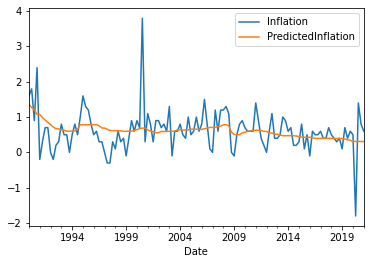

In [112]:
# 将实际通货膨胀率y和预测的通货膨胀率y_pred在同一张图上进行对比绘制
pd.concat([y, y_pred], axis=1).plot()

Our OLS model is able to roughly model the general trend of the inflation!

我们的 OLS 模型能够大致模拟通货膨胀的总体趋势！

<div class="alert alert-warning">
    Don't get too excited about the quality of that prediction! We are currently overfitting that data, so we haven't determined the actual predictive power of the model. In short, to evaluate your model you must evaluate using data the model hasn't seen before.

不要对预测的质量过于兴奋！我们目前正在过度拟合这些数据，因此尚未确定模型的实际预测能力。简而言之，要评估你的模型，你必须使用模型之前未见过的数据进行评估。
</div>

#### Exercises

Perform a more robust evaluation of the model by following these steps:

执行以下步骤以对模型进行更稳健的评估：

1. Split your input data (the `data` variable) into two-thirds training and one-third testing.

1. 将输入数据（`data` 变量）分成三分之二的训练数据和三分之一的测试数据。
2. Fit the model *only* on the training data

2. 仅使用训练数据拟合模型
3. Predict the testing data and evaluate the results.

3. 预测测试数据并评估结果。


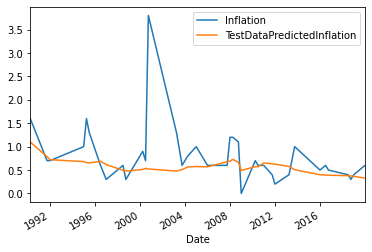

In [118]:
# 从sklearn导入训练集测试集分割函数
from sklearn.model_selection import train_test_split

# 将数据集分割为训练集和测试集,测试集占30%,随机种子为25
training_data, testing_data = train_test_split(data, test_size=0.3, random_state=25)

# 使用训练集数据拟合OLS模型,使用利率和澳元汇率预测通货膨胀率
est_mod = sm.OLS(training_data['Inflation'], training_data[["InterestRate", "AUDUSD"]]).fit()

# 输出模型统计摘要
est_mod.summary()

# 使用训练好的模型对测试集数据进行预测
test_pred = est_mod.predict(testing_data[["InterestRate", "AUDUSD"]])
# 设置预测结果的名称
test_pred.name = "TestDataPredictedInflation"

# 将测试集的实际通货膨胀率和预测值绘制在同一张图上进行对比
pd.concat([testing_data['Inflation'], test_pred], axis=1).plot()

*For solutions, see `solutions/ols_train_test.py`*

*有关解决方案，请参见 `solutions/ols_train_test.py`*


### Using the Formula interface

### 使用公式接口

The second method of performing multivariate OLS using statsmodels is using the formula interface. It is faster to develop using the formula interface, but has it's own mini "R-like" language to learn to create the formulas. That said, it automatically does things like expand multiplied variables, adds constants and can perform basic computations (try calling `np.log` inside the formula!).

使用 statsmodels 进行多元 OLS 的第二种方法是使用公式接口。使用公式接口开发速度更快，但需要学习一种类似 R 的小型语言来创建公式。也就是说，它会自动执行诸如扩展乘法变量、添加常数以及执行基本计算的操作（尝试在公式中调用 `np.log`！）。

The Formula interface is likely better for most development needs. However if you need fine grained control over the variables, you may need to drop back to the previous object-oriented interface.

公式接口可能更适合大多数开发需求。然而，如果您需要对变量进行细粒度的控制，您可能需要回到之前的面向对象接口。


In [119]:
# 导入statsmodels的公式API模块
import statsmodels.formula.api as smf
# 使用公式语法创建并拟合OLS模型，预测通货膨胀率与利率和澳元汇率的关系
est = smf.ols(formula='Inflation ~ InterestRate + AUDUSD', data=data).fit()  # Adds the constant for us

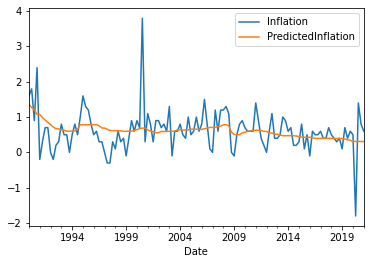

In [120]:
# 使用模型预测通货膨胀率
y_pred = est.predict(X)
# 设置预测结果的名称为"PredictedInflation"
y_pred.name = "PredictedInflation"
# 将实际通货膨胀率和预测的通货膨胀率数据合并并绘制图表
pd.concat([y, y_pred], axis=1).plot()

Using this method, we can also more easily modify the formula, for instance, to incorporate a new feature which is the interaction between Interest Rate and AUD/USD:

使用这种方法，我们还可以更轻松地修改公式，例如，加入一个新特征，即利率与澳元/美元之间的相互作用：


In [121]:
# 导入statsmodels库的formula API
import statsmodels.formula.api as smf
# 使用OLS(普通最小二乘法)拟合模型，公式包含通货膨胀率、利率、澳元汇率及其交互项
est = smf.ols(formula='Inflation ~ InterestRate + AUDUSD + (InterestRate * AUDUSD)', 
              data=data).fit()  # Does the constant for us

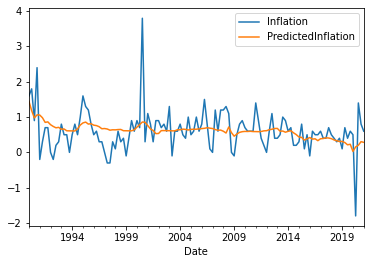

In [122]:
# 使用模型预测通货膨胀率
y_pred = est.predict(X)
# 设置预测结果的列名为"PredictedInflation"
y_pred.name = "PredictedInflation"
# 将实际通货膨胀率和预测值合并并绘制图表进行对比
pd.concat([y, y_pred], axis=1).plot()

#### Exercises

1. Perform the same train/test split that we did for the previous exercises

1. 执行与之前练习相同的训练/测试集划分
2. Review the documentation for the formula API: https://www.statsmodels.org/dev/example_formulas.html

2. 查看公式 API 的文档：https://www.statsmodels.org/dev/example_formulas.html
3. Try a few different combinations of the input parameters to get better predictive power.

3. 尝试几种不同的输入参数组合，以提高预测能力。


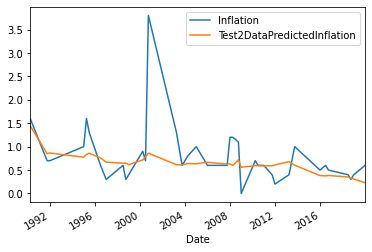

In [123]:
# 将数据集分成训练集和测试集,测试集占30%,设置随机种子为25
training_data, testing_data = train_test_split(data, test_size=0.3, random_state=25)

# 使用OLS拟合模型,公式包含利率、澳元汇率及其交互项
est_mod2 = smf.ols(formula='Inflation ~ InterestRate + AUDUSD + (InterestRate * AUDUSD)', 
              data=data).fit() 

# 输出模型摘要统计信息
est_mod2.summary()

# 使用测试集数据进行通货膨胀率预测
test_pred2 = est_mod2.predict(testing_data[["InterestRate", "AUDUSD"]])
test_pred2.name = "Test2DataPredictedInflation"

# 将实际通货膨胀率和预测值在同一图表中绘制对比
pd.concat([testing_data['Inflation'], test_pred2], axis=1).plot()

*For solutions, see `solutions/statsmodels_formula_ols.py`*

*有关解决方案，请参见 `solutions/statsmodels_formula_ols.py`*
